In [1]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
loaded_model = xgb.XGBRegressor()
loaded_model.load_model('xgboost_model.json')


In [2]:
csv_file_path = 'healthinsurance2.csv'  # Replace with the actual path to your CSV file
# Read the CSV file

mydata = pd.read_csv(csv_file_path)

mydata = mydata.dropna()
le = LabelEncoder()
mydata['city'] = le.fit_transform(mydata['city'])
X = mydata.drop(columns=['claim', 'city'])
y = mydata['claim']

feature_names = X.columns



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=69)
X_train_pandas = pd.DataFrame(X_train, columns=feature_names)
X_test_pandas = pd.DataFrame(X_test, columns=feature_names)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled_pandas = pd.DataFrame(X_train_scaled, columns=feature_names)


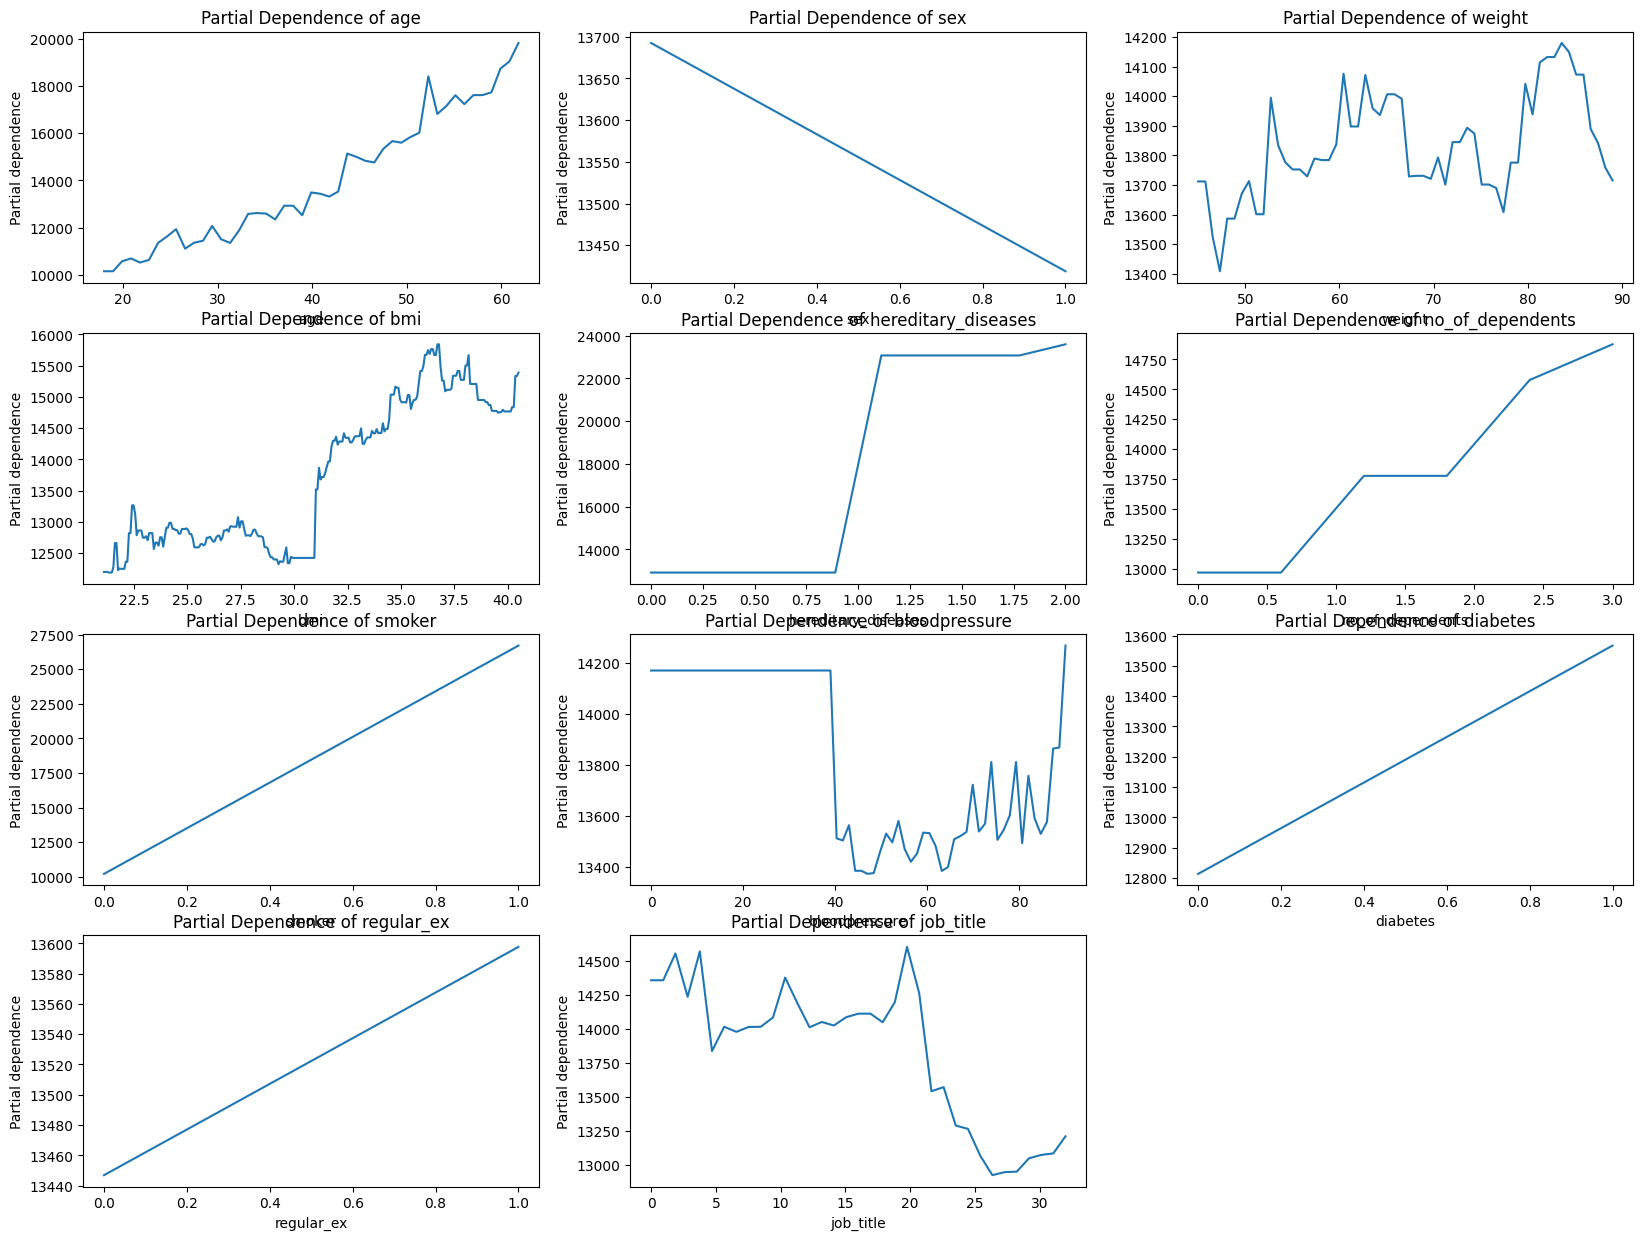

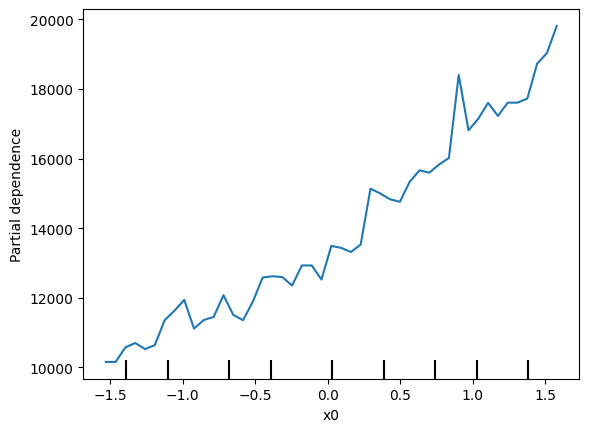

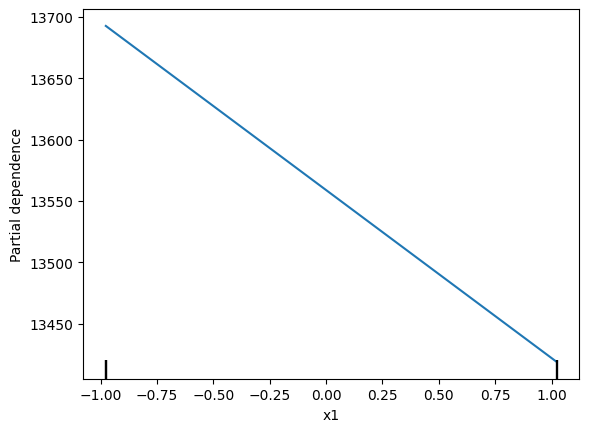

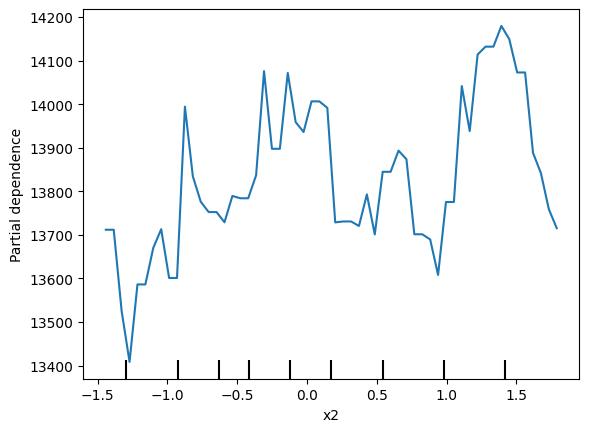

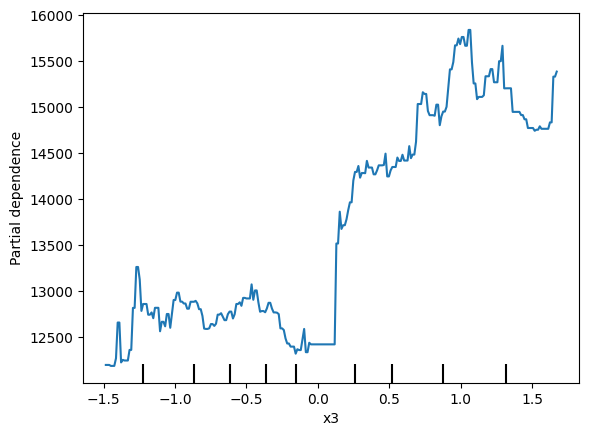

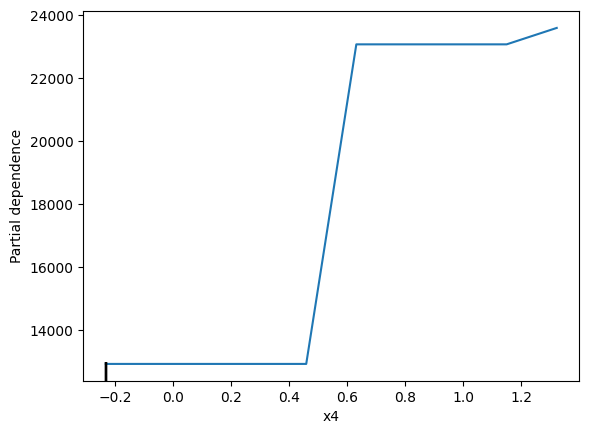

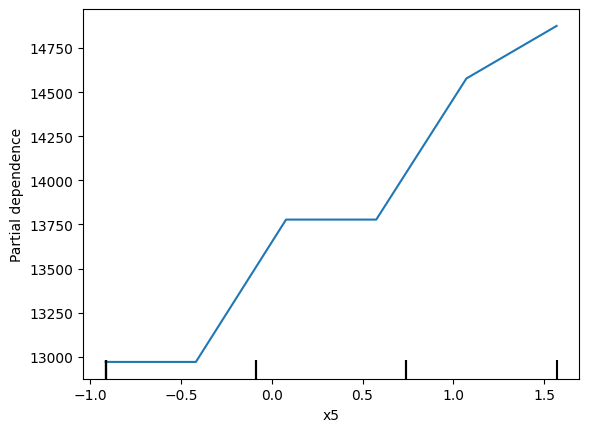

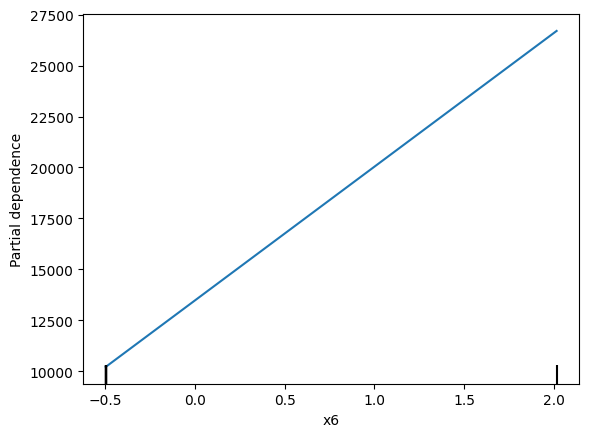

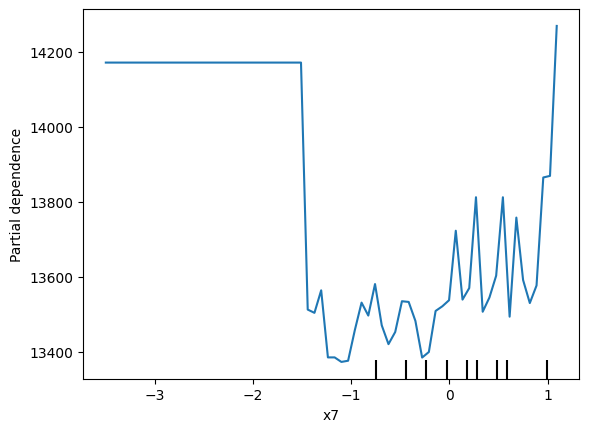

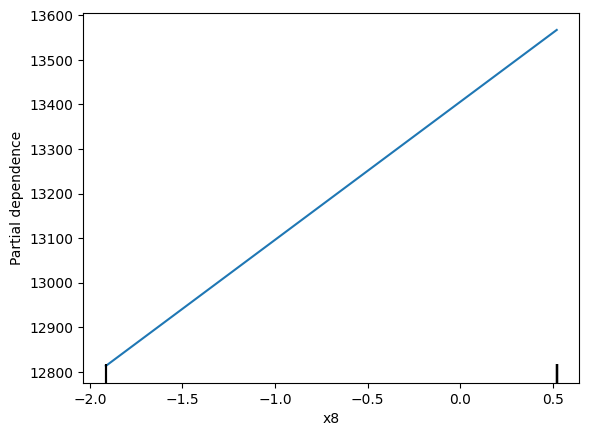

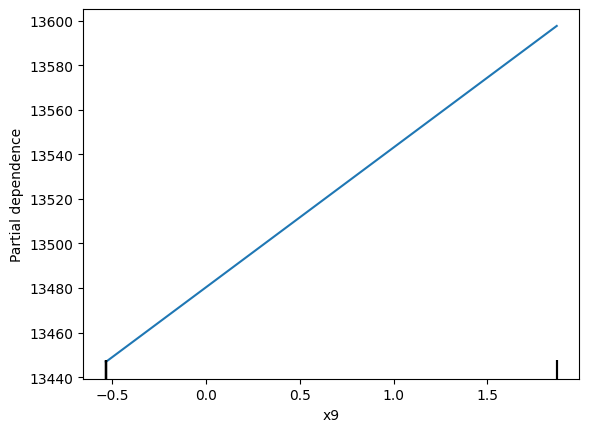

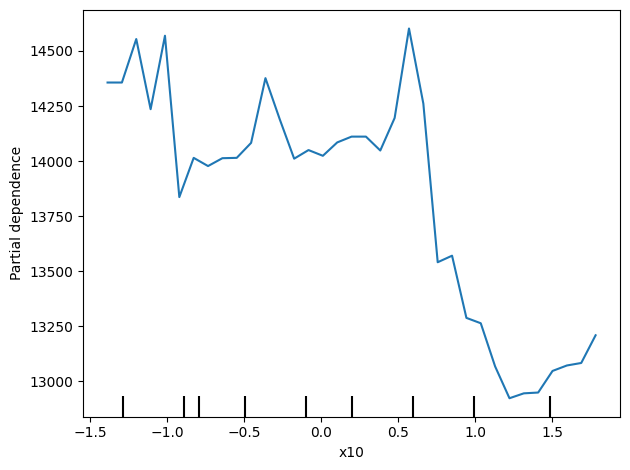

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.inspection import PartialDependenceDisplay

# Assuming scaler and loaded_model are already defined and trained

# Get the list of features
features = list(range(X_train_scaled.shape[1]))
feature_names = X.columns

# Determine the number of columns and rows for subplots
num_features = len(features)
num_cols = 3  # Number of columns for subplots
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate number of rows needed

# Create subplots with adjusted dimensions
fig, ax = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 15))

# Ensure ax is always a list of Axes
if num_features == 1:
    ax = [ax]  # Convert to a list if there's only one feature

# Flatten the axes array for easy indexing
ax = ax.flatten()

# Iterate over each feature and compute partial dependence using all distinct data points
for i, feature in enumerate(features):
    ax_row = ax[i]  # Select subplot
    
    # Compute partial dependence for the feature using all unique values
    unique_values = np.unique(X_train_scaled[:, feature])
    pdp_results = PartialDependenceDisplay.from_estimator(loaded_model, X_train_scaled, [feature], grid_resolution=len(unique_values))
    
    # Extract the values and partial dependence data
    pd_values = pdp_results.lines_[0][0].get_xdata()
    pd_average = pdp_results.lines_[0][0].get_ydata()

    # Rescale the X values back to the original scale
    original_values = scaler.inverse_transform(
        np.column_stack([pd_values if j == i else np.zeros_like(pd_values) for j in range(len(features))])
    )[:, i]
    
    # Plot the partial dependence
    ax_row.plot(original_values, pd_average)
    
    # Set labels and title for each subplot
    ax_row.set_xlabel(feature_names[i])
    ax_row.set_ylabel('Partial dependence')
    ax_row.set_title(f'Partial Dependence of {feature_names[i]}')

# Remove any unused subplots
for i in range(num_features, num_rows * num_cols):
    fig.delaxes(ax[i])

plt.tight_layout()
plt.show()


# features = list(range(X_train_scaled.shape[1]))
# pdp_results = PartialDependenceDisplay.from_estimator(loaded_model, X_train_scaled, features, feature_names=X.columns, grid_resolution=50)
# plt.clf()

# # Determine the number of columns and rows for subplots
# num_features = len(features)
# num_cols = 3 # Number of columns for subplots
# num_rows = (num_features + num_cols - 1) // num_cols  # Calculate number of rows needed

# # Create subplots with adjusted dimensions
# fig, ax = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 15))

# # Ensure ax is always a list of Axes
# if num_features == 1:
#     ax = [ax]  # Convert to a list if there's only one feature

# # Flatten the axes array for easy indexing
# ax = ax.flatten()

# # Iterate over each feature and its corresponding pd_result
# for i, (pd_result, feature_name) in enumerate(zip(pdp_results.pd_results, X.columns)):
#     ax_row = ax[i]  # Select subplot
    
#     # Iterate over values and pd (partial dependence) in pd_result
#     for values, pd in zip(pd_result['values'], pd_result['average']):
#         # Rescale the X values back to the original scale
#         original_values = scaler.inverse_transform(
#             np.column_stack([values if j == i else np.zeros_like(values) for j in range(len(features))])
#         )[:, i]
        
#         # Plot the partial dependence
#         ax_row.plot(original_values, pd)
    
#     # Set labels, title, and legend for each subplot
#     ax_row.set_xlabel(feature_name)
#     ax_row.set_ylabel('Partial dependence')
#     ax_row.legend()

# # Remove any unused subplots
# for i in range(num_features, num_rows * num_cols):
#     fig.delaxes(ax[i])

# plt.tight_layout()
# plt.show()

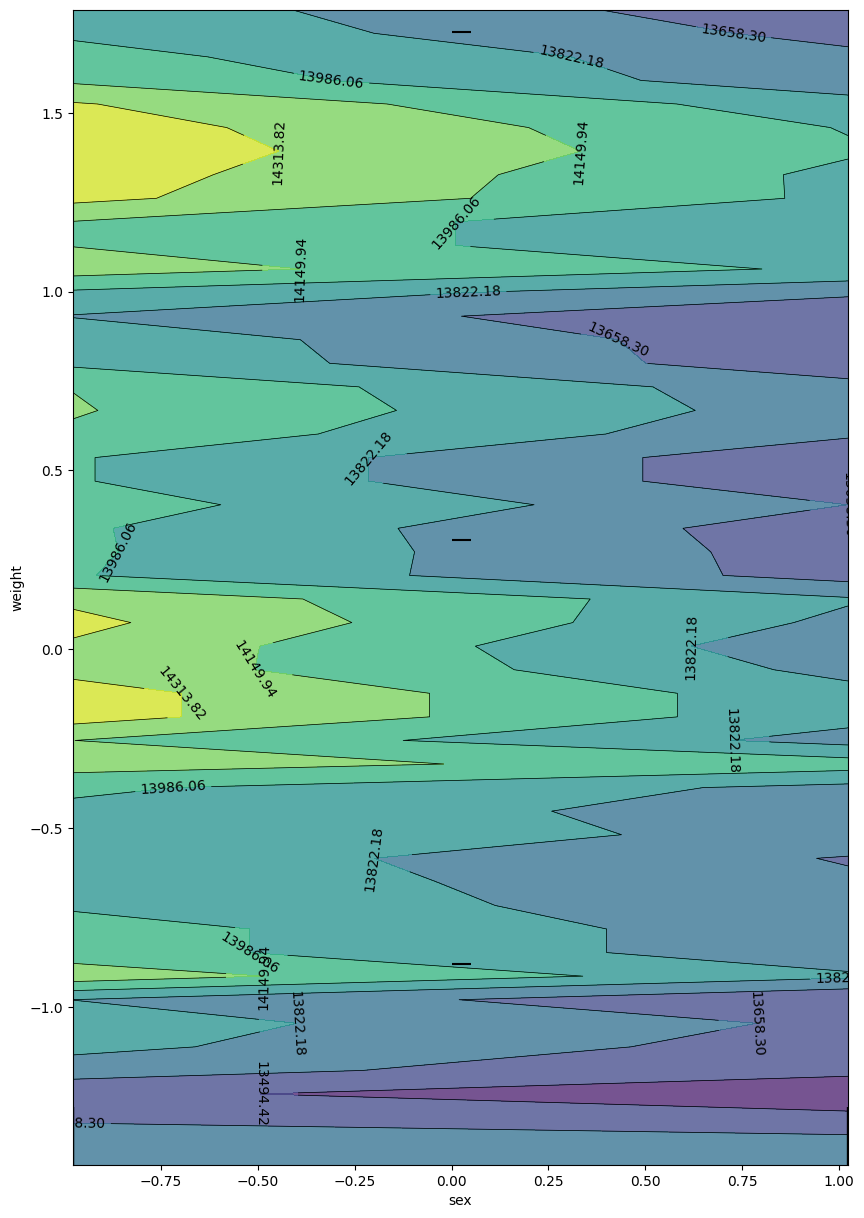

In [4]:
features = [(1,2)]
fig, ax = plt.subplots(figsize=(10, 15))
PartialDependenceDisplay.from_estimator(loaded_model, X_train_scaled, features, feature_names=X.columns, grid_resolution=50, ax=ax)

In [5]:
#1. Create a method that gets the feature list
def get_feature_list(X_train_pandas):
    return X_train_pandas.columns

#test method
print(get_feature_list(X_train_pandas))


Index(['age', 'sex', 'weight', 'bmi', 'hereditary_diseases', 'no_of_dependents', 'smoker', 'bloodpressure', 'diabetes', 'regular_ex', 'job_title'], dtype='object')


In [6]:
#2. Create a method that gets the feature values and the scaled feature values
def get_feature_values(X_train_pandas, X_train_scaled_pandas, feature_name):
    feature_values = X_train_pandas[feature_name].values
    #print(feature_values)
    scaled_feature_values = X_train_scaled_pandas[feature_name].values
    #print(scaled_feature_values)
    #sort the lists in ascending order but dont return the indices
    sorted_indices_1 = np.unique(np.sort(feature_values))

    sorted_indices_2 = np.unique(np.sort(scaled_feature_values))


    return sorted_indices_1, sorted_indices_2

#test method
feature_name = 'bloodpressure'
sorted_indices, scaled_sorted_indices = get_feature_values(X_train_pandas, X_train_scaled_pandas, feature_name)
print(sorted_indices)
print(scaled_sorted_indices)



[  0  40  41  42  44  46  48  49  50  51  52  53  54  55  56  57  58  59
  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95
  96  97  98  99 100 102 103 104 106 107 108 110 114 122]
[-3.4965246  -1.45744261 -1.40646557 -1.35548852 -1.25353442 -1.15158032
 -1.04962622 -0.99864917 -0.94767212 -0.89669507 -0.84571802 -0.79474097
 -0.74376392 -0.69278687 -0.64180982 -0.59083277 -0.53985572 -0.48887867
 -0.43790162 -0.38692457 -0.33594752 -0.28497047 -0.23399342 -0.18301637
 -0.13203932 -0.08106227 -0.03008522  0.02089183  0.07186887  0.12284592
  0.17382297  0.22480002  0.27577707  0.32675412  0.37773117  0.42870822
  0.47968527  0.53066232  0.58163937  0.63261642  0.68359347  0.73457052
  0.78554757  0.83652462  0.88750167  0.93847872  0.98945577  1.04043282
  1.09140987  1.14238692  1.19336397  1.24434102  1.29531807  1.34629512
  1.39727217  1.44824922  1.49922627  1.55020332  1.60118036  1.70

In [7]:
#3. Create a method that creates the bootstrapp dataset
def create_bootstrap_dataset(X_train_scaled_pandas, feature_name, scaled_feature_value):
    bootstrap_dataset = X_train_scaled_pandas.copy()
    bootstrap_dataset[feature_name] = scaled_feature_value
    return bootstrap_dataset

#test method
example_value = -1.24053884
bootstrap_dataset = create_bootstrap_dataset(X_train_scaled_pandas, feature_name, example_value)
bootstrap_dataset.head(100)



,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,job_title
0,0.954357,-0.977395,-0.340363,-0.882484,-0.232546,-0.086982,-0.496456,-1.240539,0.522471,-0.534724,-0.297987
1,-1.529880,-0.977395,-1.147852,-0.801190,-0.232546,-0.915210,-0.496456,-1.240539,0.522471,-0.534724,1.981531
2,-1.529880,-0.977395,-0.854220,-1.386506,-0.232546,-0.915210,2.014277,-1.240539,0.522471,-0.534724,-1.289081
3,0.812401,-0.977395,-0.413771,1.166123,-0.232546,0.741247,-0.496456,-1.240539,0.522471,-0.534724,0.593998
4,0.528488,1.023128,-0.193546,-0.329685,-0.232546,1.569475,2.014277,-1.240539,-1.913982,-0.534724,0.494889
...,...,...,...,...,...,...,...,...,...,...,...
95,-0.181294,1.023128,0.687352,-0.362203,-0.232546,0.741247,-0.496456,-1.240539,0.522471,-0.534724,0.395779
96,-1.529880,-0.977395,-1.735118,-0.573567,-0.232546,-0.915210,-0.496456,-1.240539,0.522471,1.870124,-0.595315
97,-1.458902,1.023128,-0.266954,-1.597870,-0.232546,-0.915210,-0.496456,-1.240539,0.522471,-0.534724,-0.991753
98,-0.394229,-0.977395,0.467127,0.255631,3.654357,-0.086982,2.014277,-1.240539,-1.913982,-0.534724,-1.189972


In [9]:
#4. Create a method that returns the the unique values of a feature along with the average prediction, use the methods from before
def get_unique_values_and_average_prediction(model, X_train_pandas, X_train_scaled_pandas,feature_name):
    feature_values, scaled_feature_values = get_feature_values(X_train_pandas, X_train_scaled_pandas, feature_name)
    #print(feature_values)
    unique_feature_values = scaled_feature_values
    #print(unique_feature_values)

    average_predictions = []
    for feature_value in unique_feature_values:
        bootstrap_dataset = create_bootstrap_dataset(X_train_scaled_pandas, feature_name, feature_value)
        predictions = model.predict(bootstrap_dataset)
        average_predictions.append(predictions.mean())

    return feature_values, average_predictions

#test method
feature_name = 'bloodpressure'
feature_values, average_predictions = get_unique_values_and_average_prediction(loaded_model, X_train_pandas, X_train_scaled_pandas, feature_name)
print(feature_values)
print(average_predictions)

[  0  40  41  42  44  46  48  49  50  51  52  53  54  55  56  57  58  59
  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95
  96  97  98  99 100 102 103 104 106 107 108 110 114 122]
[14170.754, 13512.525, 13503.8, 13563.852, 13385.072, 13373.016, 13376.205, 13457.757, 13481.1455, 13531.045, 13496.55, 13580.564, 13566.079, 13470.501, 13420.377, 13452.762, 13482.365, 13534.754, 13532.888, 13482.277, 13490.665, 13384.638, 13399.475, 13508.832, 13531.526, 13521.238, 13537.458, 13722.645, 13670.417, 13539.11, 13569.843, 13811.914, 13378.706, 13506.7295, 13544.736, 13602.821, 13546.201, 13811.869, 13493.596, 13757.671, 13537.585, 13591.318, 13529.893, 13576.706, 13618.024, 13864.533, 13868.802, 14411.195, 14268.453, 15992.539, 16017.088, 15773.715, 15771.734, 15994.355, 15865.028, 16109.067, 16114.647, 16232.291, 16178.108, 15849.007, 15958.867, 15910.722, 15878.345, 15860.957, 15862.946, 15860.625

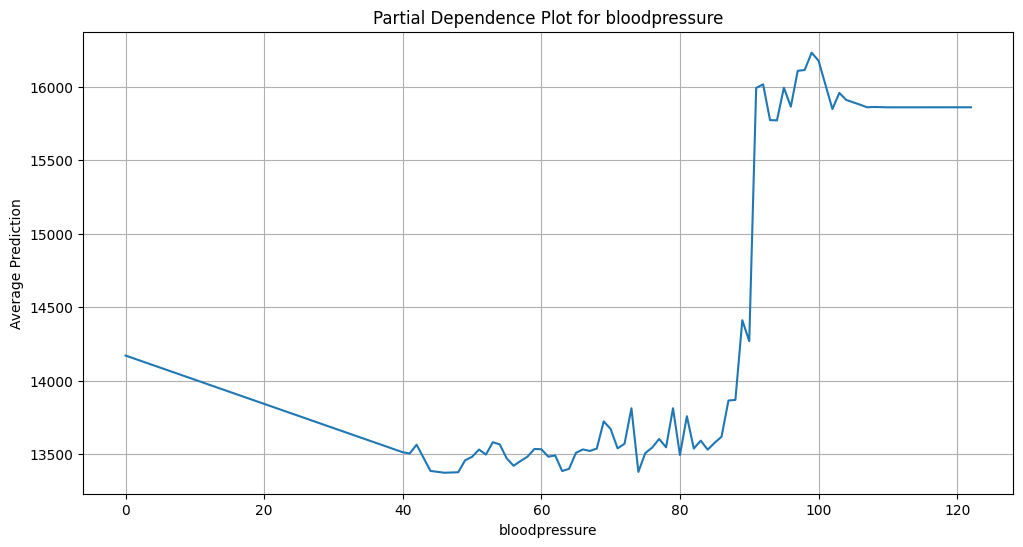

In [10]:

#5. Create a method that plots the partial dependence plot
def plot_partial_dependence_plot(unique_feature_values, average_predictions, feature_name):
    plt.figure(figsize=(12, 6))
    plt.plot(unique_feature_values, average_predictions)
    plt.xlabel(feature_name)
    plt.ylabel('Average Prediction')
    plt.title(f'Partial Dependence Plot for {feature_name}')
    plt.grid(True)
    plt.show()

#test method
feature_name = 'bloodpressure'
plot_partial_dependence_plot(feature_values, average_predictions, feature_name)

In [11]:

#6. Create a method that creates the partial dependence plots
def create_partial_dependence_plots(model, X_train_pandas, X_train_scaled_pandas):
    feature_list = get_feature_list(X_train_pandas)
    for feature_name in feature_list:
        unique_feature_values, average_predictions = get_unique_values_and_average_prediction(model, X_train_pandas, X_train_scaled_pandas, feature_name)
        plot_partial_dependence_plot(unique_feature_values, average_predictions, feature_name)


In [12]:
#add randomness to data
#1. Randomly add -1 or 1 to to every entry of Bloodpressure, Age, bmi and weight
#2. Randomly add -0.1 or 0.1 to all the other columns


#Create a method that adds randomness to the data
def add_randomness_to_data(X_train_pandas):
    X_train_pandas_random = X_train_pandas.copy()
    for column in X_train_pandas_random.columns:
        if column in ['bloodpressure', 'age', 'bmi', 'weight']:
            X_train_pandas_random[column] = X_train_pandas_random[column].apply(lambda x: x + np.random.choice([-1, 1]))
        else:
            X_train_pandas_random[column] = X_train_pandas_random[column].apply(lambda x: x + np.random.choice([-0.1, 0.1]))
    return X_train_pandas_random

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

X_train_pandas_random = add_randomness_to_data(X_train_pandas)
X_train_pandas_random.head(10)

#standardize the data with the already fitted scaler
X_train_random_scaled = scaler.transform(X_train_pandas_random)
# X_train_random_scaled_tensor = torch.tensor(X_train_random_scaled, dtype=torch.float32)
#convert X_train_random_scaled to a pandas dataframe
X_train_random_scaled_pandas = pd.DataFrame(X_train_random_scaled, columns=feature_names)  

#evaluate the model on the new data
loaded_model.fit(X_train_random_scaled, y_train)
y_train_random_pred = loaded_model.predict(X_train_random_scaled)
train_random_mse = mean_squared_error(y_train, y_train_random_pred)
train_random_rmse = np.sqrt(train_random_mse)
train_random_mae = mean_absolute_error(y_train, y_train_random_pred)
train_random_mape = mean_absolute_percentage_error(y_train, y_train_random_pred)
print(f"Train Random MSE: {train_random_mse:.4f}")
print(f"Train Random RMSE: {train_random_rmse:.4f}")
print(f"Train Random MAE: {train_random_mae:.4f}")
print(f"Train Random MAPE: {train_random_mape:.4f}")

#test set
X_test_pandas_random = add_randomness_to_data(X_test_pandas)
X_test_random_scaled = scaler.transform(X_test_pandas_random)
y_test_random_pred = loaded_model.predict(X_test_random_scaled)
test_random_mse = mean_squared_error(y_test, y_test_random_pred)
test_random_rmse = np.sqrt(test_random_mse)
test_random_mae = mean_absolute_error(y_test, y_test_random_pred)
test_random_mape = mean_absolute_percentage_error(y_test, y_test_random_pred)
print(f"Test Random MSE: {test_random_mse:.4f}")
print(f"Test Random RMSE: {test_random_rmse:.4f}")
print(f"Test Random MAE: {test_random_mae:.4f}")
print(f"Test Random MAPE: {test_random_mape:.4f}")



Train Random MSE: 1635261.0204
Train Random RMSE: 1278.7732
Train Random MAE: 769.9628
Train Random MAPE: 0.1067
Test Random MSE: 7332285.7015
Test Random RMSE: 2707.8194
Test Random MAE: 1346.0785
Test Random MAPE: 0.1670


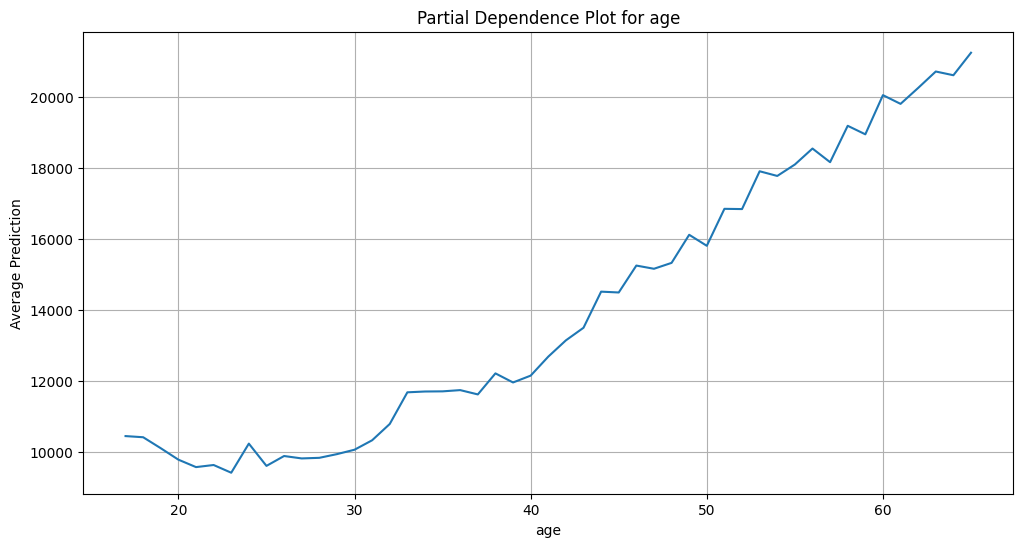

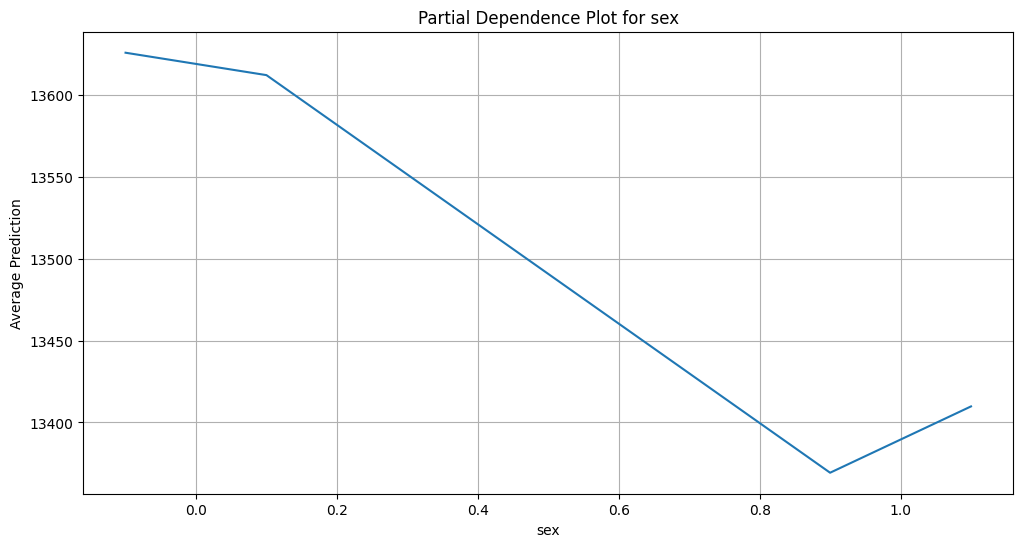

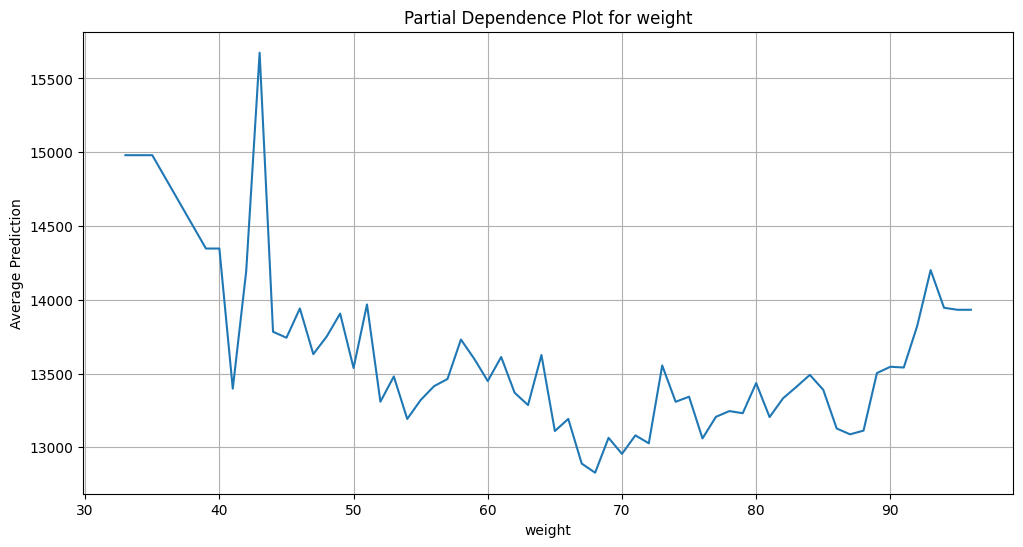

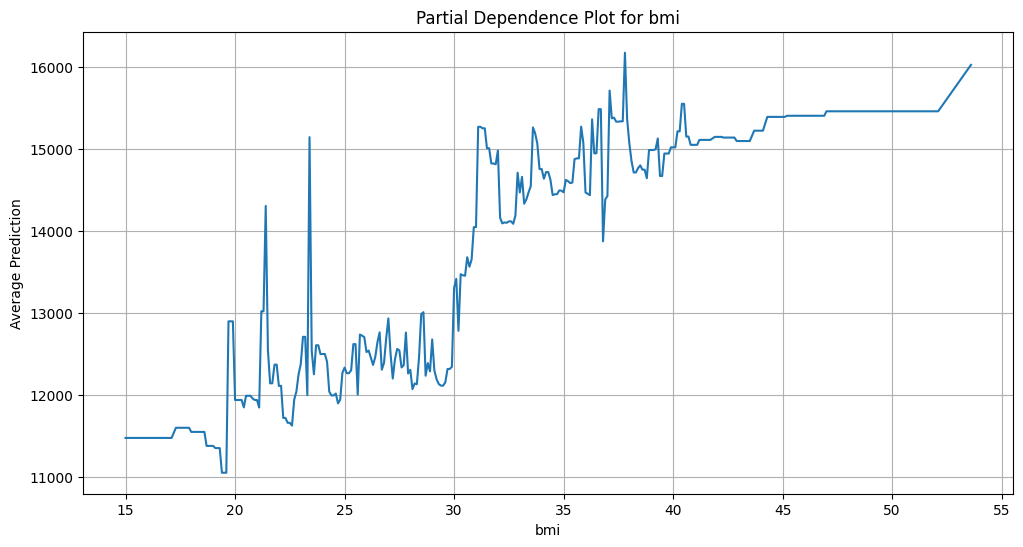

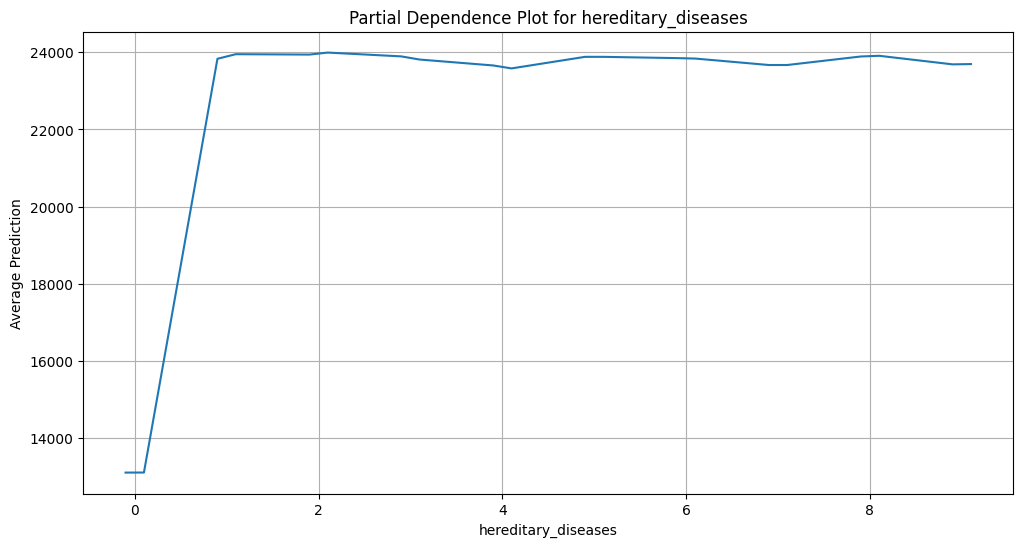

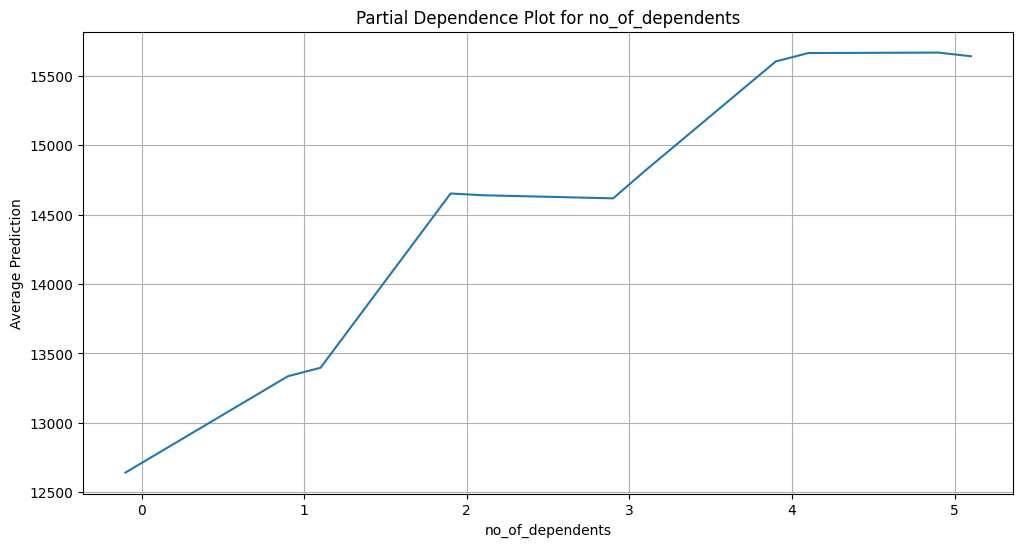

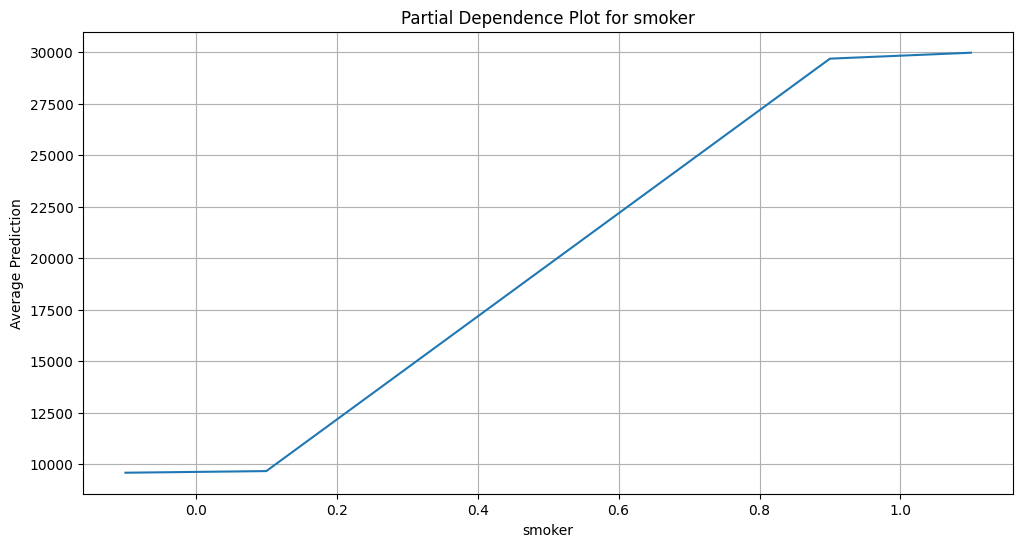

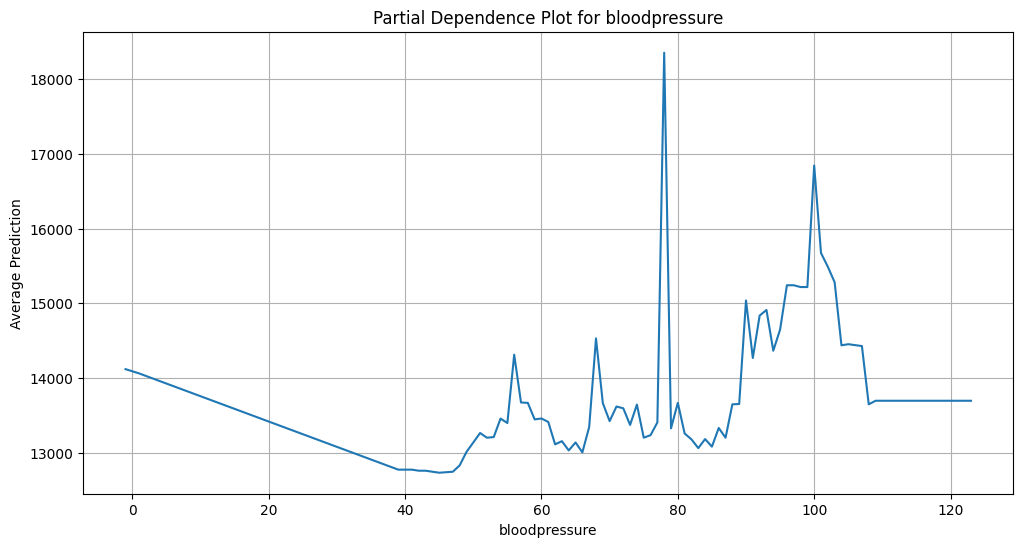

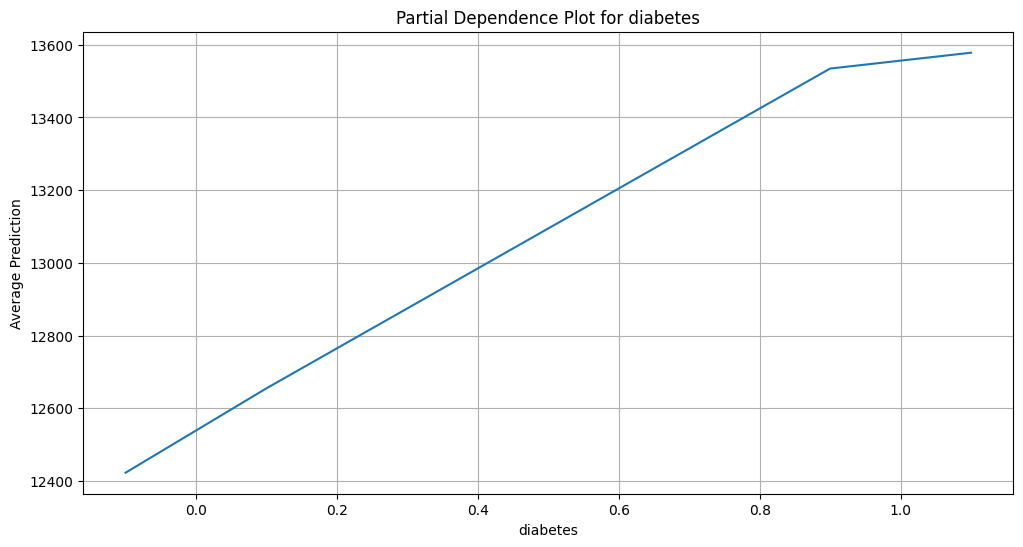

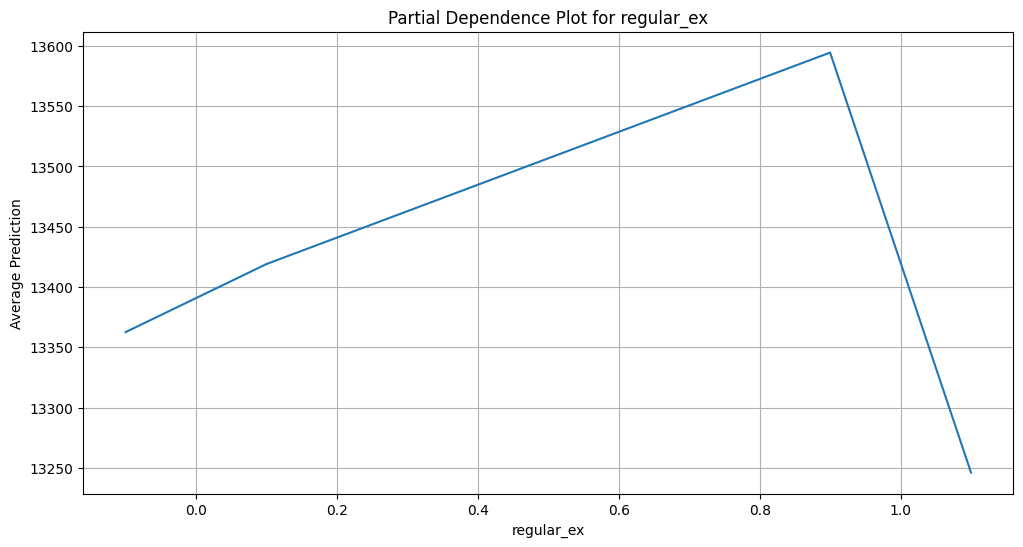

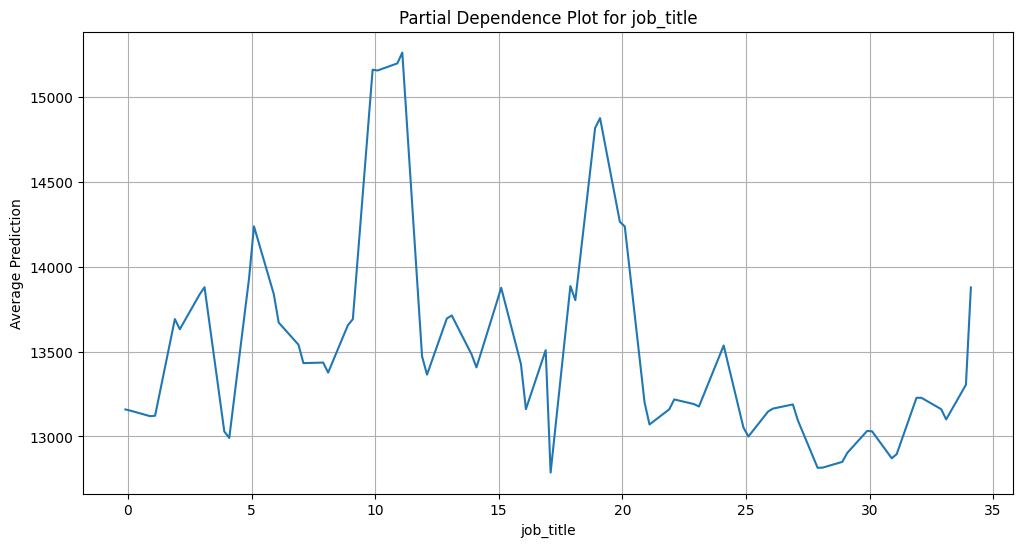

In [14]:
#plot the partial dependence plots for the new data
create_partial_dependence_plots(loaded_model, X_train_pandas_random, X_train_random_scaled_pandas)